חלק א': הכנת הנתונים והבנת הנתונים של טבלת המכירות


ייבוא וארגון הדאטה בפייתון


1.import the csv files


In [97]:
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

# Paths to your CSV files
file1 = './framingham.csv'
file2 = './GroceryDataset.csv'
file3 = './patient_dataset.csv' 


2.read the csv


In [98]:
# Read the CSV files
framingham = pd.read_csv(file1)
patient_dataset = pd.read_csv(file3)

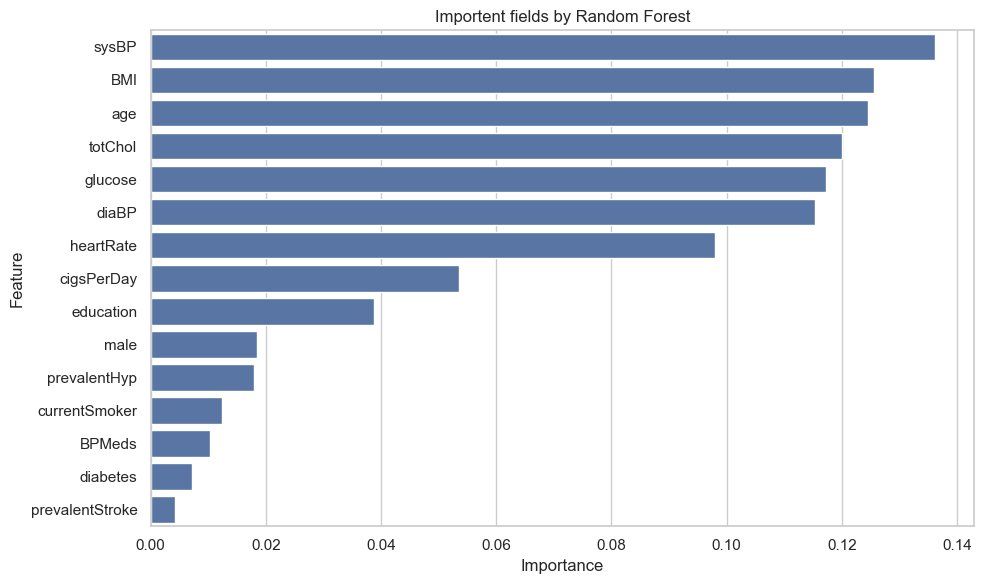

In [99]:
# שלב 2: טיפול בערכים חסרים
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(framingham), columns=framingham.columns)

# שלב 3: הפרדה בין משתנים מסבירים למשתנה מטרה
X = df_imputed.drop("TenYearCHD", axis=1)
y = df_imputed["TenYearCHD"]

# שלב 4: פיצול לסט אימון ובדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# שלב 5: בניית המודל
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# שלב 6: חשיבות מאפיינים
importances = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# שלב 7: גרף
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Importent fields by Random Forest")
plt.tight_layout()
plt.show()

In [100]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd

# קריאת הנתונים
framingham = pd.read_csv("framingham.csv")

# הגדרת X ו-y
X = df_imputed.drop("TenYearCHD", axis=1)
y = df_imputed["TenYearCHD"]

# פיצול ל-70% אימון, 30% בדיקה
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# בניית מודל עץ החלטה
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# חיזוי
y_pred = clf.predict(X_test)

# מדדי ביצועים
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"דיוק (Accuracy): {accuracy:.2f}")
print(f"Precision (דיוק חיוביים): {precision:.2f}")
print(f"Recall (שליפה): {recall:.2f}")

דיוק (Accuracy): 0.77
Precision (דיוק חיוביים): 0.25
Recall (שליפה): 0.27


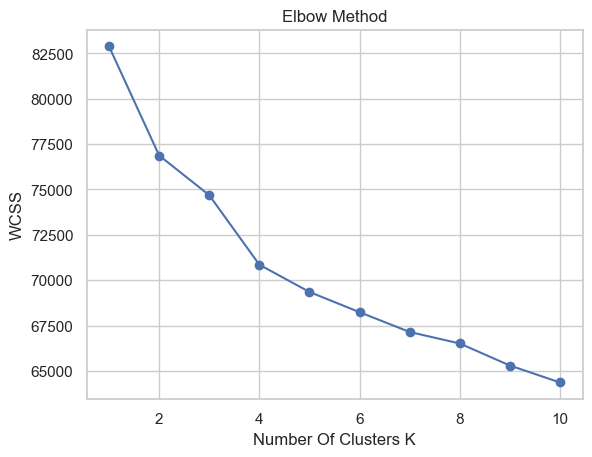

In [101]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# טעינת הנתונים
df = pd.read_csv("patient_dataset.csv")

# זיהוי עמודות מספריות וקטגוריות
numeric_features = ['age', 'blood_pressure', 'cholesterol', 'max_heart_rate', 'plasma_glucose',
                    'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree', 'hypertension', 'heart_disease']

categorical_features = ['gender', 'chest_pain_type', 'exercise_angina', 'residence_type', 'smoking_status']

# יצירת טרנספורמר לטיפול בערכים חסרים ובקידוד

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# הפעלת טרנספורמר על הנתונים (X בלבד)
X = df[numeric_features + categorical_features]
X_processed = preprocessor.fit_transform(X)

wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_processed)
    wcss.append(kmeans.inertia_)

plt.plot(K_range, wcss, 'bo-')
plt.xlabel('Number Of Clusters K')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [102]:
from sklearn.cluster import KMeans
import numpy as np

optimal_k = 4 

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_processed)

# נוסיף עמודה חדשה עם האשכול לכל מטופל
df['Cluster'] = clusters

# נבדוק כמה מטופלים יש בכל אשכול
print(df['Cluster'].value_counts())

numeric_features = ['age', 'blood_pressure', 'cholesterol', 'max_heart_rate', 'plasma_glucose',
                    'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree', 'hypertension', 'heart_disease']

cluster_summary = df.groupby('Cluster')[numeric_features].mean()
print(cluster_summary)

Cluster
3    1525
0    1522
1    1486
2    1467
Name: count, dtype: int64
               age  blood_pressure  cholesterol  max_heart_rate  \
Cluster                                                           
0        52.948752      133.801577   209.978975      146.083443   
1        54.065276      136.014805   211.290713      144.953567   
2        53.837082      133.749830   210.215406      144.396046   
3        53.796066      133.565902   207.944918      144.529180   

         plasma_glucose  skin_thickness     insulin        bmi  \
Cluster                                                          
0            161.439416       59.422794  129.096491  30.325986   
1            162.394324       60.389947  129.110443  29.479989   
2            160.409749       60.380060  130.295118  29.811052   
3            160.233747       59.692531  129.895004  30.132945   

         diabetes_pedigree  hypertension  heart_disease  
Cluster                                                  
0         

In [103]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# קריאת הנתונים כעסקאות (רשימת רשימות)
transactions = []

with open("GroceryDataset.csv", "r", encoding="utf-8") as f:
    for line in f:
        transaction = line.strip().split(',')  
        transaction = [item.strip() for item in transaction] 
        transactions.append(transaction)

# המרת הנתונים למטריצה בינארית
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)

if not frequent_itemsets.empty:
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)

# הצגת חוקים נבחרים
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].sort_values(by='lift', ascending=False).head(10))


Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []
